## Project 2: Twitter Data-WeRateDogs On Data Wrangling

### Data Gathering
For this project, we have three differenct data we will work.Each data have its own method of extraction.But lets first import our libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
%matplotlib inline

In [2]:
#load first data from a csv file
df_twittercsv = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twittercsv

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### For our second data, we have to use the request library to import the 'tweet image predictions.tsv'.

In [4]:
#import request library
import requests

In [5]:
#Use the request.get method
file = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv','wb') as f:
    f.write(file.content)

In [6]:
df_ip = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
df_ip

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
#Lets use the tweepy library to get the last data from tweet_json.txt
#First lets  create an array list
df_apitweets =[]
with open('tweet-json.txt') as f:
    all_apitweets = f.readlines()
    for each_apitweets in all_apitweets:
        one_apitweets = json.loads(each_apitweets)
        tweet_id = one_apitweets['id']
        retweet_count = one_apitweets['retweet_count']
        favorite_count = one_apitweets['favorite_count']
        df_apitweets.append({'tweet_id': tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': favorite_count})
#Now lets create a pandaframe for the array list        
df_allapitweets_json =pd.DataFrame(df_apitweets, columns = ['tweet_id','retweet_count','favorite_count'])
            

In [9]:
#test
df_allapitweets_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Assessing the data 

Assessing data can be done virtually and programmaticallly. From the instructions, it says I should assess 8 quality issues and 3 tidness issues. <br>
Lets check the details of the instructions;<br>

You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.<br>

Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.<br>

The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.<br>

You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.<br>

Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data<br>

Now lets programmatically assess data.


In [67]:
#lets assess the data
df_twittercsv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
#lets assess the data
df_twittercsv.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
#lets assess the data
df_twittercsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
#lets assess the data
df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
#lets assess the data
df_ip.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
#lets assess the data
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
#lets assess the data
df_allapitweets_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [17]:
#lets assess the data
df_allapitweets_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [18]:
#lets assess the data
df_allapitweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


###  Lets make a copy of the data and work with it.

In [19]:
#Copy data
df_twittercsv_clean = df_twittercsv.copy()
df_ip_clean = df_ip.copy()
df_allapitweets_json_clean = df_allapitweets_json.copy()

### Tideness Issues
From the instructions, we are asked to work on 2 tidiness issues.
Tidiness issues focus more on the structure of the data.<br>
1.Image predictions should be added to df_twittercsv_clean dataset to serve as the main data.<br>
2.Retweet count table should added or merge with main data (df_twittercsv_clean).<br>
3.Change the structure for doggo,floofer,puppo,pupper as values under the column head dog_stage.<br>


### Doggo, Floofer, Puppo, Pupper are presented in column heads instead of values and must be included in the main table(df_twitter_clean).


In [20]:
#Code
df_twittercsv_clean = pd.melt(df_twittercsv_clean, id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','name'],
                                 var_name='dog_stage', value_name='dog_stage_status')

In [21]:
#test
df_twittercsv_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_stage_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,None



### Lets merge two tables (twittercsv and df_allapitweets) 

In [22]:
#Code
df_twittercsv_clean = pd.merge(df_twittercsv_clean, df_allapitweets_json_clean,
                                 on=['tweet_id'], how='left')

In [23]:
#Test
df_twittercsv_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_stage_status,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None,6514.0,33819.0


### 2rd Tidiness issue
Image predictions table should be merged with the df_twitter_csv table for dog breeds analysis

In [24]:
#Lets convert boolean values true and false into 1 and 0
df_ip_clean.p1_dog = df_ip_clean.p1_dog.replace({True: 1, False: 0})
df_ip_clean.p2_dog = df_ip_clean.p2_dog.replace({True: 1, False: 0})
df_ip_clean.p3_dog = df_ip_clean.p3_dog.replace({True: 1, False: 0})



In [25]:
# Lets create condition variable and then lets use the  numpyselect method 
conditions = [
    (df_ip_clean['p1_dog'] == 1 ),
    (df_ip_clean['p1_dog'] == 0 ) & (df_ip_clean['p2_dog'] == 1 ),
    (df_ip_clean['p2_dog'] == 0 ) & (df_ip_clean['p3_dog'] == 1 ),
    (df_ip_clean['p3_dog'] == 0 )
]
values = [df_ip_clean.p1,df_ip_clean.p2,df_ip_clean.p3,np.nan]

In [26]:
#Lets create a new column for dog breed final in image predictions.
df_ip_clean['dog_breed_final'] = np.select(conditions, values)
df_ip_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed_final
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,1,collie,0.156665,1,Shetland_sheepdog,0.061428,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,1,miniature_pinscher,0.074192,1,Rhodesian_ridgeback,0.072010,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,1,malinois,0.138584,1,bloodhound,0.116197,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,1,redbone,0.360687,1,miniature_pinscher,0.222752,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,1,Rottweiler,0.243682,1,Doberman,0.154629,1,miniature_pinscher


In [27]:
#code
df_twittercsv_clean = pd.merge(df_twittercsv_clean,df_ip_clean[['dog_breed_final','tweet_id']],
                                 on=['tweet_id'], how='left')

In [28]:
#test
df_twittercsv_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_stage_status,retweet_count,favorite_count,dog_breed_final
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None,8853.0,39467.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None,6514.0,33819.0,Chihuahua


In [29]:
#Test
df_twittercsv_clean.dog_breed_final.value_counts()

golden_retriever                  692
Labrador_retriever                452
Pembroke                          384
Chihuahua                         380
pug                               260
toy_poodle                        208
chow                              204
Samoyed                           184
Pomeranian                        168
cocker_spaniel                    136
malamute                          136
French_bulldog                    128
Chesapeake_Bay_retriever          124
miniature_pinscher                104
Cardigan                           92
Eskimo_dog                         88
Staffordshire_bullterrier          88
beagle                             84
German_shepherd                    84
Shih-Tzu                           80
Siberian_husky                     80
Lakeland_terrier                   76
Shetland_sheepdog                  76
Rottweiler                         76
kuvasz                             76
Maltese_dog                        76
Italian_grey

### Quality issues
Quality issues deals with the content of the dataset.
There are 8 quality issues that we will correct.
1.Remove null values<br>
2.Convert tweet Id from int to string<br>
3.convert reweet and favourite to int instead of float<br>
4.Remove unecessary fiqures such as +00000.. from the datetime<br>
5.Change date column data type to datetime datatype<br>
6.Remove all duplicates from the df_twittercsv_clean table<br>
7.Remove retweets from df_twittercsv_clean rows that have non-null values<br>
8.Remove extracted numbers from text columns<br>
9.Slipt timestamp to month,day,year and hour<br>


In [30]:
#remove null values 
df_twittercsv_clean['dog_stages'] = np.where((df_twittercsv_clean['dog_stage'] == df_twittercsv_clean['dog_stage_status']),df_twittercsv_clean['dog_stage_status'],np.nan)

In [31]:
#test
df_twittercsv_clean = df_twittercsv_clean.drop(['dog_stage','dog_stage_status'],axis=1)

### Quality issue  2 - convert tweet Id from int to string

In [32]:
#code
df_twittercsv_clean['tweet_id'] = df_twittercsv_clean['tweet_id'].astype(str)
df_ip_clean['tweet_id'] = df_ip_clean['tweet_id'].astype(str)
df_allapitweets_json_clean['tweet_id'] = df_allapitweets_json_clean['tweet_id'].astype(str)

In [33]:
#test
df_twittercsv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 0 to 9423
Data columns (total 17 columns):
tweet_id                      9424 non-null object
in_reply_to_status_id         312 non-null float64
in_reply_to_user_id           312 non-null float64
timestamp                     9424 non-null object
source                        9424 non-null object
text                          9424 non-null object
retweeted_status_id           724 non-null float64
retweeted_status_user_id      724 non-null float64
retweeted_status_timestamp    724 non-null object
expanded_urls                 9188 non-null object
rating_numerator              9424 non-null int64
rating_denominator            9424 non-null int64
name                          9424 non-null object
retweet_count                 9416 non-null float64
favorite_count                9416 non-null float64
dog_breed_final               7004 non-null object
dog_stages                    394 non-null object
dtypes: float64(6), int64(2)

### Quality issue 3 -convert reweet and favourite to int instead of float.

In [34]:
#code
df_twittercsv_clean['retweet_count'] = df_twittercsv_clean['retweet_count'].fillna(0)
df_twittercsv_clean['retweet_count'] = df_twittercsv_clean['retweet_count'].astype(int)
df_twittercsv_clean['favorite_count'] = df_twittercsv_clean['favorite_count'].fillna(0)
df_twittercsv_clean['favorite_count'] = df_twittercsv_clean['favorite_count'].astype(int)


In [35]:
#test
df_twittercsv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 0 to 9423
Data columns (total 17 columns):
tweet_id                      9424 non-null object
in_reply_to_status_id         312 non-null float64
in_reply_to_user_id           312 non-null float64
timestamp                     9424 non-null object
source                        9424 non-null object
text                          9424 non-null object
retweeted_status_id           724 non-null float64
retweeted_status_user_id      724 non-null float64
retweeted_status_timestamp    724 non-null object
expanded_urls                 9188 non-null object
rating_numerator              9424 non-null int64
rating_denominator            9424 non-null int64
name                          9424 non-null object
retweet_count                 9424 non-null int64
favorite_count                9424 non-null int64
dog_breed_final               7004 non-null object
dog_stages                    394 non-null object
dtypes: float64(4), int64(4), ob

### Quality issue 4 -Remove unecessary fiqures "+00000" from the datetime

In [36]:
# lets remove +0000
#code
df_twittercsv_clean['timestamp'] = df_twittercsv_clean['timestamp'].map(lambda x: x.lstrip('').rstrip('+0000'))

In [37]:
#test
df_twittercsv_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_breed_final,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,Chihuahua,NaN


### Quality issue 5- change date column data type to datetime datatype.

In [38]:
#Code
df_twittercsv_clean['timestamp'] = pd.to_datetime(df_twittercsv_clean.timestamp)

In [39]:
#test
df_twittercsv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 0 to 9423
Data columns (total 17 columns):
tweet_id                      9424 non-null object
in_reply_to_status_id         312 non-null float64
in_reply_to_user_id           312 non-null float64
timestamp                     9424 non-null datetime64[ns]
source                        9424 non-null object
text                          9424 non-null object
retweeted_status_id           724 non-null float64
retweeted_status_user_id      724 non-null float64
retweeted_status_timestamp    724 non-null object
expanded_urls                 9188 non-null object
rating_numerator              9424 non-null int64
rating_denominator            9424 non-null int64
name                          9424 non-null object
retweet_count                 9424 non-null int64
favorite_count                9424 non-null int64
dog_breed_final               7004 non-null object
dog_stages                    394 non-null object
dtypes: datetime64[ns](1

In [40]:
#test
df_twittercsv_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_breed_final,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,Chihuahua,NaN


### Quality issue 6- remove all duplicates from the df_twittercsv_clean table

In [41]:
#Code
df_twittercsv_clean.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
9394     True
9395     True
9396     True
9397     True
9398     True
9399     True
9400     True
9401     True
9402     True
9403     True
9404     True
9405     True
9406     True
9407     True
9408     True
9409     True
9410     True
9411     True
9412     True
9413     True
9414     True
9415     True
9416     True
9417     True
9418     True
9419     True
9420     True
9421     True
9422     True
9423     True
Length: 9424, dtype: bool

In [42]:
#Test
df_twittercsv_clean.drop_duplicates(inplace=True)

In [43]:
#Test
df_twittercsv_clean.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
7080    False
7082    False
7139    False
7162    False
7197    False
7236    False
7259    False
7463    False
7465    False
7466    False
7481    False
7506    False
7507    False
7537    False
7614    False
7622    False
7635    False
7683    False
7711    False
7731    False
7757    False
7769    False
7781    False
7804    False
7990    False
8015    False
8029    False
8103    False
8116    False
8151    False
Length: 2750, dtype: bool

### Quality Issue 7-  remove retweets from df_twittercsv_clean rows that have non-null values

In [44]:
#code
df_twittercsv_clean = df_twittercsv_clean[df_twittercsv_clean.retweeted_status_id.isnull()]
df_twittercsv_clean = df_twittercsv_clean[df_twittercsv_clean.retweeted_status_user_id.isnull()]
df_twittercsv_clean = df_twittercsv_clean[df_twittercsv_clean.retweeted_status_timestamp.isnull()]

In [45]:
#tests
df_twittercsv_clean.info(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 8151
Data columns (total 17 columns):
tweet_id                      2531 non-null object
in_reply_to_status_id         87 non-null float64
in_reply_to_user_id           87 non-null float64
timestamp                     2531 non-null datetime64[ns]
source                        2531 non-null object
text                          2531 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2467 non-null object
rating_numerator              2531 non-null int64
rating_denominator            2531 non-null int64
name                          2531 non-null object
retweet_count                 2531 non-null int64
favorite_count                2531 non-null int64
dog_breed_final               1956 non-null object
dog_stages                    356 non-null object
dtypes: datetime64[ns](1), float

### Quality issue 8- remove extracted numbers from text columns

In [46]:
#code
df_twittercsv_clean['text'] = df_twittercsv_clean['text'].str.replace(r'\d+','')

In [47]:
#test
df_twittercsv_clean.text.str.extract('(\d{1,3}\/[1-9][0-9]?[0-9])',expand=True)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


### Drop unimportant columns for our analysis

In [48]:
#drop some data columns
df_twittercsv_clean=df_twittercsv_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1)

In [49]:
#Test
df_twittercsv_clean.head(4)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_breed_final,dog_stages
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,8853,39467,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,6514,33819,Chihuahua,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,4328,25461,Chihuahua,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,8964,42908,Labrador_retriever,NaN


In [50]:
#code
df_twittercsv_clean=df_twittercsv_clean.dropna()

In [51]:
#test
df_twittercsv_clean.head(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_breed_final,dog_stages
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,7711,32467,Pembroke,doggo
43,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,3128,20771,German_shepherd,doggo
99,872967104147763200,2017-06-09 00:02:31,Here's a very large dog. He has a date later. ...,12,10,None,5669,28031,Labrador_retriever,doggo
108,871515927908634625,2017-06-04 23:56:03,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,3628,20730,komondor,doggo
121,869596645499047938,2017-05-30 16:49:31,This is Scout. He just graduated. Officially a...,12,10,Scout,3327,16476,Chihuahua,doggo
172,858843525470990336,2017-05-01 00:40:27,I have stumbled puppon a doggo painting party....,13,10,None,3771,16304,golden_retriever,doggo
191,855851453814013952,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMa...,13,10,None,19196,47844,flat-coated_retriever,doggo
200,854010172552949760,2017-04-17 16:34:26,"At first I thought this was a shy doggo, but i...",11,10,None,3433,17169,English_springer,doggo
240,846514051647705089,2017-03-28 00:07:32,This is Barney. He's an elder doggo. Hitches a...,13,10,Barney,13076,48410,golden_retriever,doggo
248,845397057150107648,2017-03-24 22:08:59,Say hello to Mimosa. She's an emotional suppor...,13,10,Mimosa,2072,8241,Dandie_Dinmont,doggo


### Quality issue 9- slipt timestamp to month,day,year and hour

In [52]:

#Lets convert timestamp to month,hour and change year and hour to object datatype
import datetime as dt
df_twittercsv_clean['Day'] = df_twittercsv_clean['timestamp'].dt.day_name()
df_twittercsv_clean['Month'] = df_twittercsv_clean['timestamp'].dt.month_name()
df_twittercsv_clean['Year'] =df_twittercsv_clean['timestamp'].dt.year
df_twittercsv_clean['Hours'] = df_twittercsv_clean['timestamp'].dt.hour
df_twittercsv_clean['Hours'] = df_twittercsv_clean.Hours.astype(str)
df_twittercsv_clean['Year'] = df_twittercsv_clean.Year.astype(str)

In [53]:
df_twittercsv_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_breed_final,dog_stages,Day,Month,Year,Hours
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,7711,32467,Pembroke,doggo,Wednesday,July,2017,15
43,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,3128,20771,German_shepherd,doggo,Sunday,July,2017,21
99,872967104147763200,2017-06-09 00:02:31,Here's a very large dog. He has a date later. ...,12,10,None,5669,28031,Labrador_retriever,doggo,Friday,June,2017,0
108,871515927908634625,2017-06-04 23:56:03,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,3628,20730,komondor,doggo,Sunday,June,2017,23
121,869596645499047938,2017-05-30 16:49:31,This is Scout. He just graduated. Officially a...,12,10,Scout,3327,16476,Chihuahua,doggo,Tuesday,May,2017,16


In [54]:
#lets drop timestamp column
df_twittercsv_clean=df_twittercsv_clean.drop(['timestamp'], axis=1)

In [55]:
#test
df_twittercsv_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_breed_final,dog_stages,Day,Month,Year,Hours
9,890240255349198849,This is Cassie. She is a college pup. Studying...,14,10,Cassie,7711,32467,Pembroke,doggo,Wednesday,July,2017,15
43,884162670584377345,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,3128,20771,German_shepherd,doggo,Sunday,July,2017,21
99,872967104147763200,Here's a very large dog. He has a date later. ...,12,10,None,5669,28031,Labrador_retriever,doggo,Friday,June,2017,0
108,871515927908634625,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,3628,20730,komondor,doggo,Sunday,June,2017,23
121,869596645499047938,This is Scout. He just graduated. Officially a...,12,10,Scout,3327,16476,Chihuahua,doggo,Tuesday,May,2017,16


## Store data into a new csv file
df_twittercsv_clean will be stored in a new file named twitter_clean.csv

In [56]:
#Store the clean data in a CSV file
df_twittercsv_clean.to_csv('twitter_archive_master.csv', index = False)

#load data to a dataframe
df = pd.read_csv('twitter_archive_master.csv')

In [57]:
#test
df.head()

,tweet_id,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_breed_final,dog_stages,Day,Month,Year,Hours
0,890240255349198849,This is Cassie. She is a college pup. Studying...,14,10,Cassie,7711,32467,Pembroke,doggo,Wednesday,July,2017,15
1,884162670584377345,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,3128,20771,German_shepherd,doggo,Sunday,July,2017,21
2,872967104147763200,Here's a very large dog. He has a date later. ...,12,10,None,5669,28031,Labrador_retriever,doggo,Friday,June,2017,0
3,871515927908634625,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,3628,20730,komondor,doggo,Sunday,June,2017,23
4,869596645499047938,This is Scout. He just graduated. Officially a...,12,10,Scout,3327,16476,Chihuahua,doggo,Tuesday,May,2017,16


## Analysing  and Visualization
<B><I>NOTE</I></B><B> In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and one (1) visualization.</B>

### Main insights
1.From my analysis, after visualing retweet and favorite count by dog stages, puppo has the highest count<br>
2.From my analysis, after visualing retweet and favorite count by month, june has the highest count.<br>
3.From my analysis, after visualing rating numerator and denominator by dog stages, puppo had the highest ratings

### Visualization 1 - Lets find the visuals for retweet and favorite average count for dog stages

In [58]:
def plot(col1, col2, col3):
    df.groupby([col1])[['retweet_count','favorite_count']].mean().plot(kind='barh');
    plt.title(col2)
    plt.xlabel(col3, fontsize=10)
    plt.ylabel('Dog Stages', fontsize=10);

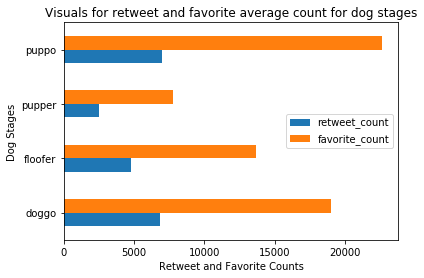

In [59]:
#code and test
plot('dog_stages', 'Visuals for retweet and favorite average count for dog stages','Retweet and Favorite Counts')

### Visualization 2- Lets find retweet and favorite count by month

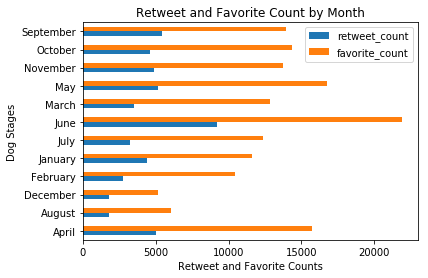

In [60]:
#code and test
plot('Month', 'Retweet and Favorite Count by Month','Retweet and Favorite Counts')

In [61]:
#Lets find the lowest denominator by checking if we will find some counts above 10
df[df['rating_numerator']>10]['rating_numerator'].count()

192

In [62]:
#Lets find the lowest denominator by checking if we will find some counts below 10
df[df['rating_denominator']>10]['rating_denominator'].count()

0

### Visualization 3- Lets find the most rated dog

In [63]:
#Code 
def plot1(col1, col2, col3):
    df.groupby([col1])[['rating_denominator','rating_numerator']].mean().plot(kind='barh');
    plt.title(col2)
    plt.xlabel(col3, fontsize=15)
    plt.ylabel('Dog Stages', fontsize=15);

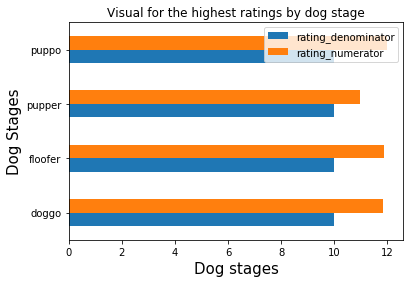

In [64]:
#test
plot1('dog_stages', 'Visual for the highest ratings by dog stage','Dog stages')

## Conclusion
From the above analyses and visualization, puppo is most retweeted and favorite dog on twitter<br>
Also, from my little research ,June is meant to celebrate dogs thats why there are a lot of retweets that month.
